In [11]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [12]:
data = pd.read_csv('SeoulBikeData_mod.csv')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1
1,12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1
2,12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1
3,12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1
4,12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,0,1
8756,11,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,0,1
8757,11,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,0,1
8758,11,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,0,1


In [13]:
data
data.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,6.526027,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2.504110,0.049315,0.966324
std,3.448048,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404
min,1.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.000000,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
50%,7.000000,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,3.000000,0.000000,1.000000
75%,10.000000,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,3.000000,0.000000,1.000000
max,12.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,4.000000,1.000000,1.000000


In [14]:
#no holiday = 0, holiday = 1
#functional day = 1, non functional day = 0
#winter = 1
#spring = 2
#summer = 3
#autumn = 4

In [15]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

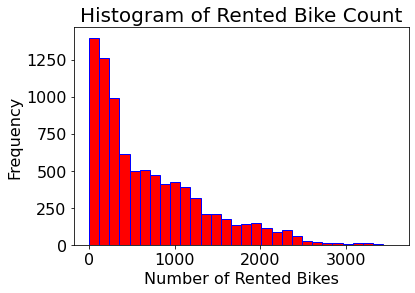

In [16]:
# plot histogram for rented bike count
rented_bike_count= data['Rented Bike Count']

plt.hist(rented_bike_count, bins=30, color='red', edgecolor='blue')


plt.title('Histogram of Rented Bike Count', fontsize= 20 )
plt.rc('font',size=16) 
plt.xlabel('Number of Rented Bikes', fontsize= 16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

In [17]:
# design matrix and target
#x = data.drop(['Date'], axis = 1)
X = data['Rented Bike Count']
y = data['Rented Bike Count']

In [18]:
# design matrix and target
X = data.drop(['Rented Bike Count'], axis=1)
y = data['Rented Bike Count']

#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [19]:
# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the train data
model.fit(X_train, y_train)

# Use the model to predict the test data
y_pred = model.predict(X_test)

# Form residual
resid = y_test - y_pred



In [20]:
# Root Mean Squared Error
RMSE = np.sqrt(np.mean(resid**2))
print('The Root Mean Squared Error is',RMSE)
print()

# Mean Absolute Error
MAE = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE)
print()

#Rsquared
R2 = r2_score(y_test, y_pred)
print('The Rsquared value is',R2)

The Root Mean Squared Error is 426.12408519090053

The Mean Absolute Error is 319.6749212766306

The Rsquared value is 0.5577274160798491


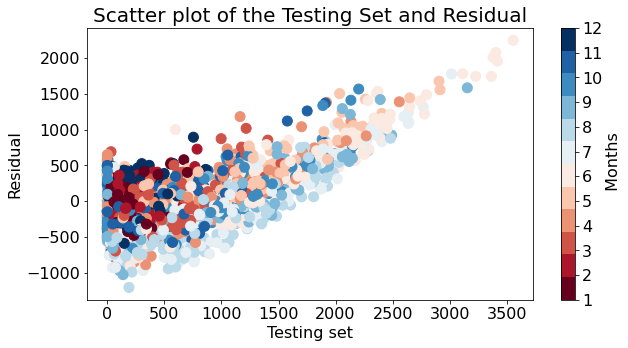

In [21]:
key = X_test['Date']

fig = plt.figure(figsize=(10,5))
plt.scatter(y_test, resid,c=key,s=100, cmap=plt.cm.get_cmap('RdBu', 12,))
plt.colorbar(ticks=range(13), label=' Months')
plt.title('Scatter plot of the Testing Set and Residual', fontsize=20)
plt.xlabel('Testing set', fontsize=16)
plt.ylabel('Residual', fontsize=16)

plt.show()